In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
# Load the dataset
data = pd.read_csv('wine_quality.csv')
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,red,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,rose,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,red,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,red,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
4,red,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0


In [ ]:
# DRop rows where we have at least one Null value
data.dropna(inplace=True)

# Exercise 1 - Type Prediction

In [ ]:
# Dropping the 'quality' column for the first classifier
data_type = data.drop(columns=['quality'])

data_type.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,red,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,rose,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,red,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,red,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,red,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [ ]:
# Separating features and target variable
X_type = data_type.drop('type', axis=1)
y_type = data_type['type']

# Splitting the dataset into training and testing sets
X_train_type, X_test_type, y_train_type, y_test_type = train_test_split(X_type, y_type, test_size=0.3, random_state=0)

## 1.1

In [ ]:

sqrt_n = int(np.sqrt(X_train_type.shape[0]))
print("√Ν=",sqrt_n)

# Create a list for the three parameters that will be used for testing
n_neighbors = [5, 15, sqrt_n, 100]
weights = ['uniform', 'distance']
p_values = [1, 2]

# The list to store the results
results = []

# Iterate over all possible combinations of parameters
for n_neighbor in n_neighbors:
    for weight in weights:
        for p_value in p_values:
            # Create and train the classifier
            knn_classifier = KNeighborsClassifier(
                              n_neighbors=n_neighbor,
                              weights=weight,
                              p=p_value
                            )
            knn_classifier.fit(X_train_type, y_train_type)

            # Make the predictions fpr the test set
            y_pred = knn_classifier.predict(X_test_type)

            # Calculate the accuracy
            accuracy = accuracy_score(y_test_type, y_pred)

            # Add the results to the list
            results.append({
                'n_neighbors': n_neighbor,
                'weights': weight,
                'p': p_value,
                'accuracy': accuracy
            })

# Create the results dataframe from the results list
knn_accuracy_scores = pd.DataFrame(results)

√Ν= 67


In [ ]:
# Sort the accuracy scores from best to worst
knn_accuracy_scores.sort_values(by='accuracy', ascending=False, inplace=True)
knn_accuracy_scores

,n_neighbors,weights,p,accuracy
10,67,distance,1,0.749355
14,100,distance,1,0.749355
6,15,distance,1,0.743167
7,15,distance,2,0.738525
11,67,distance,2,0.738525
2,5,distance,1,0.734915
15,100,distance,2,0.734915
3,5,distance,2,0.720474
8,67,uniform,1,0.713254
12,100,uniform,1,0.711707


- "Distance" was steadily the best performing weight parameter and it's the expected result since we use weighted average for the predicted value instead of the average value of all the k neighbors.
- p value = 1 (Manhattan) was also the value with the best accuracy scores. This can be affected by the feauture scale and distribution as Euclidean is more prone to feature domination from large values.
- Most of the n_neighbors values seems to have good results with Square Root N and 100 giving the best results.


## 1.2

Since KNN is distance based, feautures that have large values tend to dominate the results and skew the predictions.
In our dataset "free sulfur dioxide" and	"total sulfur dioxide" seem to have a large range of values

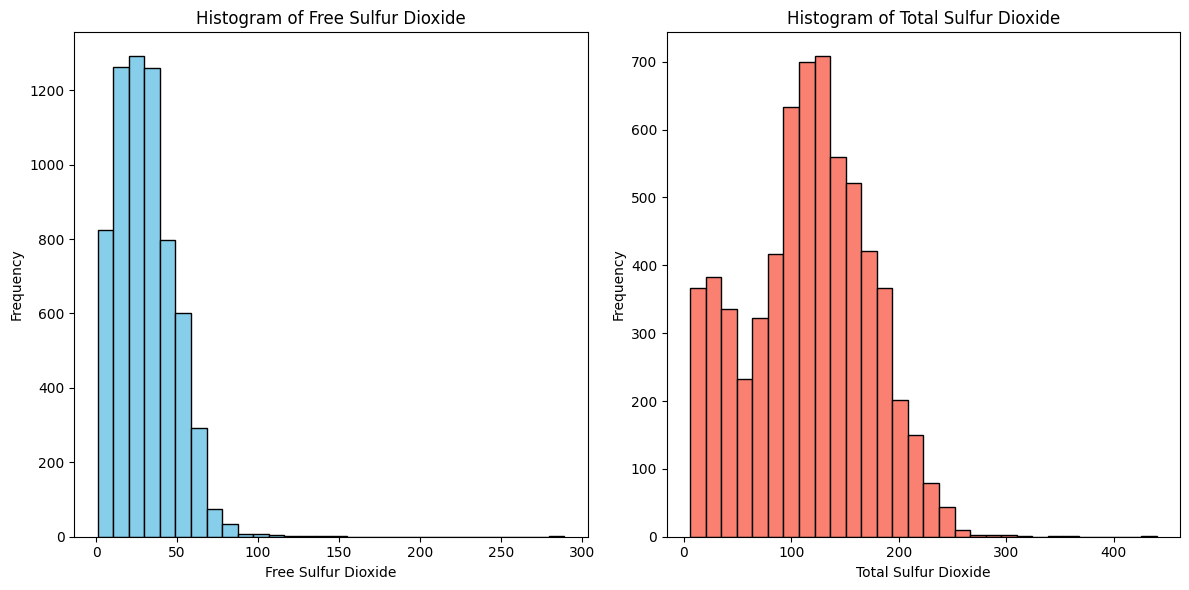

In [ ]:
# Plotting histograms for "free sulfur dioxide" and "total sulfur dioxide"
plt.figure(figsize=(12, 6))

# Histogram for "free sulfur dioxide"
plt.subplot(1, 2, 1)
plt.hist(data_type['free sulfur dioxide'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Free Sulfur Dioxide')
plt.xlabel('Free Sulfur Dioxide')
plt.ylabel('Frequency')

# Histogram for "total sulfur dioxide"
plt.subplot(1, 2, 2)
plt.hist(data_type['total sulfur dioxide'], bins=30, color='salmon', edgecolor='black')
plt.title('Histogram of Total Sulfur Dioxide')
plt.xlabel('Total Sulfur Dioxide')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


## 1.3

In [ ]:
decisionTree = DecisionTreeClassifier(random_state=0)
decisionTree.fit(X_train_type, y_train_type)

# Make the predictions fpr the test set
y_pred = decisionTree.predict(X_test_type)

# Calculate the accuracy
accuracy = accuracy_score(y_test_type, y_pred)

feature_importance = decisionTree.feature_importances_

# Creating a DataFrame to display feature names and their importance
feature_importance_df = pd.DataFrame({'Feature': X_type.columns, 'Importance': feature_importance})

# Sorting the DataFrame based on importance
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)
feature_importance_df.reset_index(drop=True, inplace=True)

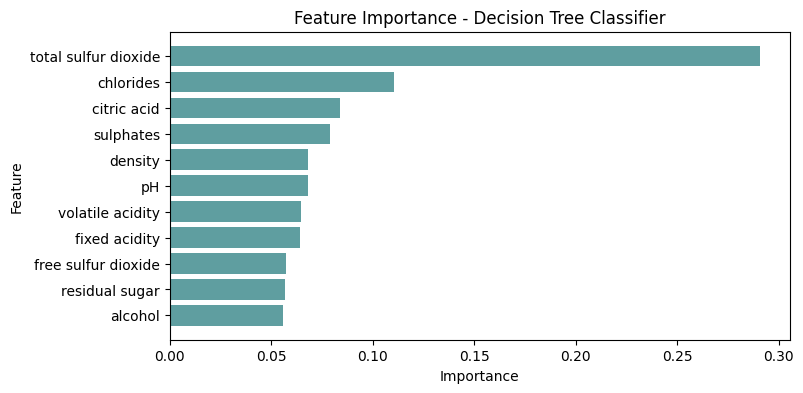

In [ ]:
plt.figure(figsize=(8, 4))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='cadetblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance - Decision Tree Classifier')
plt.gca().invert_yaxis()  # Inverting y-axis for better readability
plt.show()

- ***total sulfur dioxide*** looks like it has the most impact anf is the most important feauture for our classifier

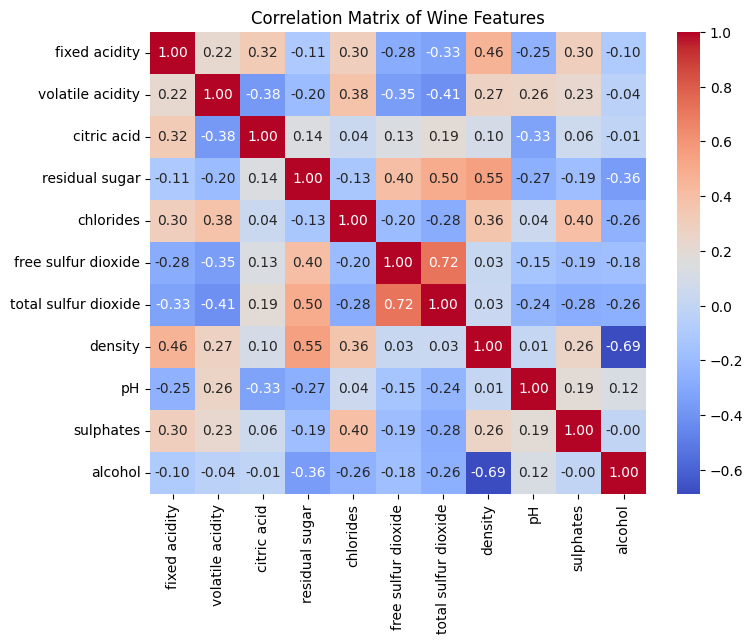

In [ ]:
# Creating the correlation matrix
correlation_matrix = X_type.corr()

# Plotting the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Wine Features')
plt.show()


- alcohol has a big negative corellation with density: it could justify the lower importance score
- "residual sugar" has correlation with the *important* feauture "total sulfur dioxide" as well as "free sulfur dioxide"


## 1.4

In [ ]:
# Initializing MinMaxScaler
scaler = MinMaxScaler()

# Applying MinMaxScaler to the features (excluding the target variable 'type')
X_train_type_scaled = scaler.fit_transform(X_train_type)

# Converting the scaled features back to a DataFrame
X_train_type_scaled_df = pd.DataFrame(X_train_type_scaled, columns=X_type.columns)

# Displaying the first few rows of the scaled data
X_train_type_scaled_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.355372,0.466667,0.138554,0.030675,0.083195,0.013889,0.020737,0.190357,0.503876,0.191011,0.478261
1,0.404959,0.293333,0.054217,0.029141,0.136439,0.065972,0.099078,0.201929,0.480620,0.359551,0.376812
2,0.214876,0.193333,0.120482,0.076687,0.179700,0.208333,0.407834,0.143877,0.403101,0.117978,0.217391
3,0.247934,0.320000,0.018072,0.016871,0.124792,0.059028,0.066820,0.186500,0.558140,0.230337,0.289855
4,0.280992,0.180000,0.150602,0.076687,0.038270,0.076389,0.262673,0.119769,0.162791,0.247191,0.333333


### Manhattan distance

In [ ]:
knn_classifier = KNeighborsClassifier(p=1)
knn_classifier.fit(X_train_type_scaled_df, y_train_type)
y_pred = knn_classifier.predict(X_test_type)
accuracy = accuracy_score(y_test_type, y_pred)
print(accuracy)

0.42496132026817945


### Euclidean distanct

In [ ]:
knn_classifier = KNeighborsClassifier(p=2)
knn_classifier.fit(X_train_type_scaled_df, y_train_type)
y_pred = knn_classifier.predict(X_test_type)
accuracy = accuracy_score(y_test_type, y_pred)
print(accuracy)

0.5373904074265085


# Exercise 2 - Quality Prediction

In [ ]:
# Dropping the 'type' column for the second classifier
data_quality = data

data_quality.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,red,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,rose,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,red,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,red,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
4,red,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0


In [ ]:
dummies = pd.get_dummies(data_quality['type'])
res = pd.concat([data_quality,dummies], axis=1)
data_quality = res.drop(columns='type')
data_quality

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red,rose,white
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6.0,1,0,0
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6.0,0,1,0
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6.0,1,0,0
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6.0,1,0,0
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6458,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6.0,1,0,0
6459,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5.0,1,0,0
6460,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6.0,1,0,0
6461,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5.0,1,0,0


In [ ]:
# Separating features and target variable
X_quality = data_quality.drop('quality', axis=1)
y_quality = data_quality['quality']

# Splitting the dataset into training and testing sets
X_train_quality, X_test_quality, y_train_quality, y_test_quality = train_test_split(data_quality, y_quality, test_size=0.3, random_state=0)

In [ ]:
sqrt_n = int(np.sqrt(X_train_type.shape[0]))

# Create a list for the three parameters that will be used for testing
n_neighbors = [5, 15, sqrt_n, 100]
weights = ['uniform', 'distance']
p_values = [1, 2]

# The list to store the results
results = []

# Iterate over all possible combinations of parameters
for n_neighbor in n_neighbors:
    for weight in weights:
        for p_value in p_values:
            # Create and train the classifier
            knn_classifier = KNeighborsClassifier(
                              n_neighbors=n_neighbor,
                              weights=weight,
                              p=p_value
                            )
            knn_classifier.fit(X_train_quality, y_train_quality)

            # Make the predictions fpr the test set
            y_pred = knn_classifier.predict(X_test_quality)

            # Calculate the MAE
            mae = mean_absolute_error(y_test_quality, y_pred)

            # Add the results to the list
            results.append({
                'n_neighbors': n_neighbor,
                'weights': weight,
                'p': p_value,
                'mae': mae
            })

# Create the results dataframe from the results list
knn_accuracy_scores_quality = pd.DataFrame(results)

In [ ]:
# Sort the accuracy scores from best to worst
knn_accuracy_scores_quality.sort_values(by='mae', inplace=True)
knn_accuracy_scores_quality

,n_neighbors,weights,p,mae
6,15,distance,1,0.293966
2,5,distance,1,0.307891
10,67,distance,1,0.332130
14,100,distance,1,0.351728
4,15,uniform,1,0.370294
0,5,uniform,1,0.376998
7,15,distance,2,0.428056
3,5,distance,2,0.432182
11,67,distance,2,0.447653
15,100,distance,2,0.451264


Weighted distance and Manhattan distance give the best results once again but this time the smaller neighbors (15 & 5) give the best results with the first being the best.